## Plain Gradient Descent with Fixed Learning Rate

We consider the Mean Squared Error (MSE) cost function for Ordinary Least Squares (OLS) regression:

$$ C(\beta) = \frac{1}{n}(\mathbf{X}\beta - \mathbf{y})^T(\mathbf{X}\beta - \mathbf{y}) $$

The analytical gradient is given by:

$$ \nabla C(\beta) = \frac{2}{n}\mathbf{X}^T(\mathbf{X}\beta - \mathbf{y}) $$

The parameter update rule for plain gradient descent is:

$$ \beta = \beta - \eta \nabla C(\beta) $$

where $ \eta $ is the learning rate.


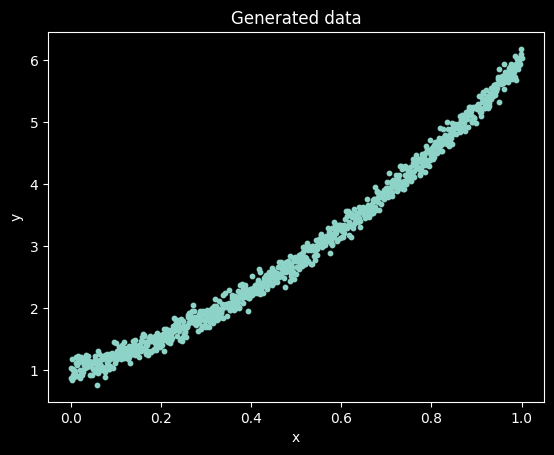

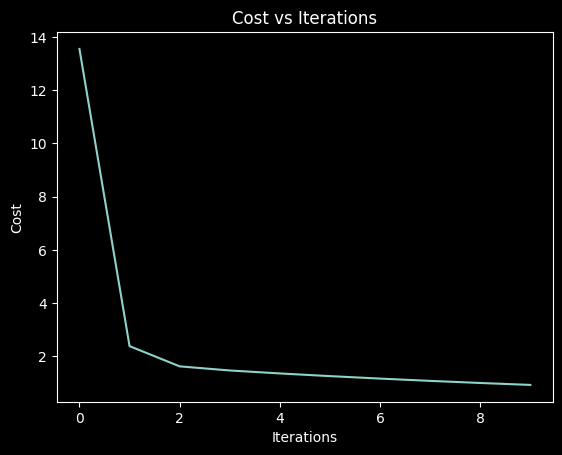

Minimum cost: 0.9288519039306039


In [150]:
import numpy as np
import matplotlib.pyplot as plt
def generate_data(n_samples):
    x = np.linspace(0, 1, n_samples)
    y = 1 + 2*x + 3*x**2 +np.random.normal(0, 0.1, n_samples)
    return x, y

x, y = generate_data(1000)
X = np.column_stack((np.ones(len(x)), x))
y = y.reshape(-1, 1)

plt.scatter(x, y, s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated data")
plt.show()
learning_rate = 0.3
n_iterations = 10

beta = np.random.randn(X.shape[1], 1)
cost_history = []

for i in range(n_iterations):
    y_pred = X @ beta
    error = y_pred - y
    cost = (1 / len(y)) * np.sum(error**2)
    cost_history.append(cost)
    gradient = (2 / len(y)) * X.T @ error
    beta -= learning_rate * gradient

plt.plot(range(n_iterations), cost_history, label="Plain GD")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()
print("Minimum cost:", cost_history[-1])

### Newton's Method Using the Hessian Matrix

While gradient descent uses first-order derivatives to find the minimum of a function, Newton's method leverages second-order derivatives (the Hessian matrix) for potentially faster convergence.

The update rule for Newton's method is:

$$ \beta = \beta - H^{-1}(\beta) \nabla C(\beta) $$

where:

- $\nabla C(\beta)$ is the gradient vector.
- $H(\beta) $ is the Hessian matrix of second derivatives.

For the MSE cost function in OLS regression, the Hessian matrix is given by:

$$ H(\beta) = \frac{2}{n} \mathbf{X}^T \mathbf{X} $$

Newton's method can achieve quadratic convergence near the optimum, but it requires computation of the Hessian and its inverse, which can be computationally intensive for large datasets.

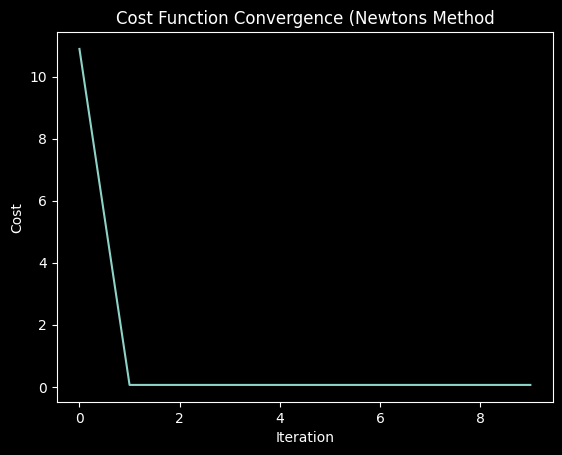

Minimum cost: 0.060396418241812466


In [151]:
beta_newton = np.random.randn(X.shape[1], 1)
n_iterations_newton = 10
cost_history_newton = []

# Precompute the Hessian matrix and its inverse
H = (2 / len(y)) * X.T @ X
H_inv = np.linalg.inv(H)

### Using the eigen value of Hessian matrix to calculate the learning rate
### Instead of using the inverse of the Hessian matrix
# H_eign_values, H_Eign_vec = np.linalg.eig(H)
# max_eign = np.max(H_eign_values)
# inver_max_eign = 1 / max_eign

for i in range(n_iterations_newton):
    y_pred = X @ beta_newton
    error = y_pred - y
    cost = (1 / len(y)) * np.sum(error**2)
    cost_history_newton.append(cost)
    gradient = (2 / len(y)) * X.T @ error
    beta_newton -= H_inv @ gradient
    # beta_newton -= inver_max_eign * gradient

plt.plot(range(n_iterations_newton), cost_history_newton)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Convergence (Newtons Method")
plt.show()

print("Minimum cost:", cost_history_newton[-1])

## Adding Momentum to Gradient Descent
To accelerate convergence, we can add **momentum** to the gradient descent algorithm. Momentum helps by considering the previous update's direction and magnitude, smoothing out the updates, and potentially leading to faster convergence.

The momentum update equations are:

$$ v_t = \gamma v_{t-1} + \eta \nabla C(\beta) $$
$$ \beta = \beta - v_t $$

where:

- $ v_t $ is the velocity vector at iteration $ t $.
- $ \gamma $ is the momentum coefficient (typically between 0 and 1).
- $ \eta $ is the learning rate.
- $ \nabla C(\beta) $ is the gradient of the cost function.

Our goal is to find the parameters $ \beta $ that minimize the cost function using gradient descent with a fixed learning rate, and to compare the convergence with and without momentum.

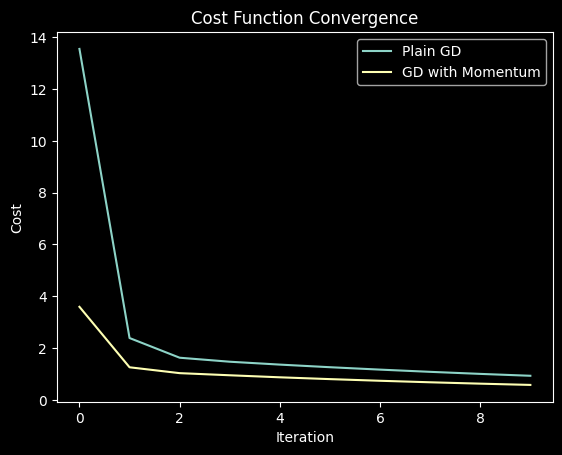

Minimum cost: 0.5756526812701075


In [152]:
beta_momentum = np.random.randn(X.shape[1], 1)
velocity = np.zeros_like(beta_momentum)
beta_momentum = np.random.randn(X.shape[1], 1)
velocity = np.zeros_like(beta_momentum)
gamma = 0.1  # Momentum coefficient
cost_history_momentum = []

# Gradient descent with Momentum
for i in range(n_iterations):
    y_pred = X @ beta_momentum
    error = y_pred - y
    cost = (1 / len(y)) * np.sum(error**2)
    cost_history_momentum.append(cost)
    gradient = (2 / len(y)) * X.T @ error
    velocity = gamma * velocity + learning_rate * gradient
    beta_momentum -= velocity

plt.plot(range(n_iterations), cost_history, label="Plain GD")
plt.plot(range(n_iterations), cost_history_momentum, label="GD with Momentum")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()

print("Minimum cost:", cost_history_momentum[-1])

## Stockastic Gradient Descent (SGD)

In the context of large datasets, computing the gradient of the cost function using the entire dataset can be computationally expensive. Stockastic Gradient Descent (SGD) addresses this issue by computing the gradient using a single sample or a small batch of samples at each iteration.

The update rule for SGD is:

The idea behind SGD comes from the observation that the cost function which we want to minimize, can almost always be written 
as a sum of cost functions for each individual data point.

$$C(\beta) = \sum_{i=1}^{n} c_i(x_i,\beta)$$

where $C_i(\beta)$ is the cost function for the $i$-th data point.

This in turn implies that the gradient of the cost function can be written as a sum of gradients of the individual data points:

$$\nabla_{\beta} C(\beta) = \sum_{i=1}^{n} \nabla_{\beta} c_i(x_i,\beta)$$

The idea now is to approximate the gradient of the cost function by sum over all data points in one mini-batch picked at random in each iteration. This is called Stochastic Gradient Descent (SGD).

$$\nabla_{\beta} C(\beta)  = \sum_{i=1}^{n} \nabla_{\beta} c_i(x_i,\beta) -> \sum_{i\in B} \nabla_{\beta} c_i(x_i,\beta)$$

where $B$ is the mini-batch of data points.

The update rule for SGD is:

$$ \beta_{j+1} = \beta_j - \eta_j \sum_{i\in B} \nabla_{\beta} c_i(x_i,\beta) $$

where: k is picked at random in each iteration with equal probability.




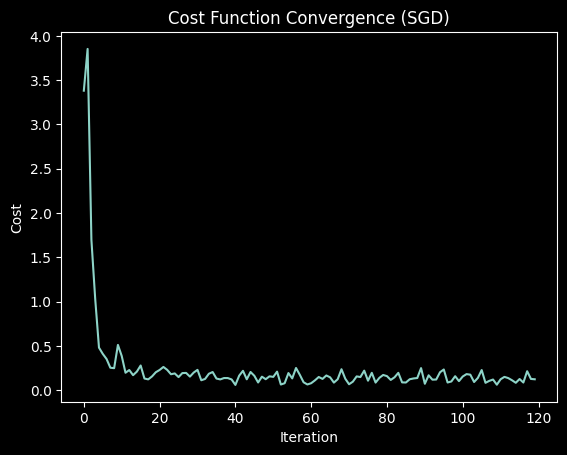

Minimum cost: 0.12223394362559933


In [153]:
# Parameters for SGD
learning_rate = 0.1        
n_epochs = 3              
n_batches = 40            
batch_size = len(y) // n_batches  # Number of samples in each batch

beta_sgd = np.random.randn(X.shape[1], 1)

cost_history_sgd = []

for epoch in range(n_epochs):
    for i in range(n_batches):
        rand_indices = np.random.choice(len(y), batch_size, replace=True) # Randomly sample batch_size elements with replacement read https://sebastianraschka.com/faq/docs/sgd-methods.html
        X_batch = X[rand_indices]
        y_batch = y[rand_indices]

        y_pred = X_batch @ beta_sgd
        error = y_pred - y_batch
        cost = (1 / len(y_batch)) * np.sum(error**2)
        cost_history_sgd.append(cost)
        gradient = (2 / len(y_batch)) * X_batch.T @ error
        beta_sgd -= learning_rate * gradient
        learning_rate = learning_rate / (1 + epoch)# adjusting the learning rate over epochs

plt.plot(range(len(cost_history_sgd)), cost_history_sgd)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Convergence (SGD)")
plt.show()

print("Minimum cost:", cost_history_sgd[-1])


##

## Adaptive Gradient Algorithm (AdaGrad)
Adapts the learning rate for each parameter individually, scales the the learning rate based on the historical sum squared gradients for each parameter. allows for larger updates for infrequent parameters and smaller updates for frequent parameters.

1. Initialize the sum of squared gradients $G_0= 0$.

2. Update the accumulator at each iteration:
$$ G_t = G_{t-1} + (\nabla C(\beta_t))^2 $$

It is done element-wise for each parameter, so each parameter $ \beta_i $ has it's own accumulator $ G_{t,i} $.

3. Update the parameters:

$$ \beta_{t+1} = \beta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \nabla C(\beta_t) $$

where:
- $ \eta $ is the global learning rate.
- $ \epsilon $ is a small constant to prevent division by zero.


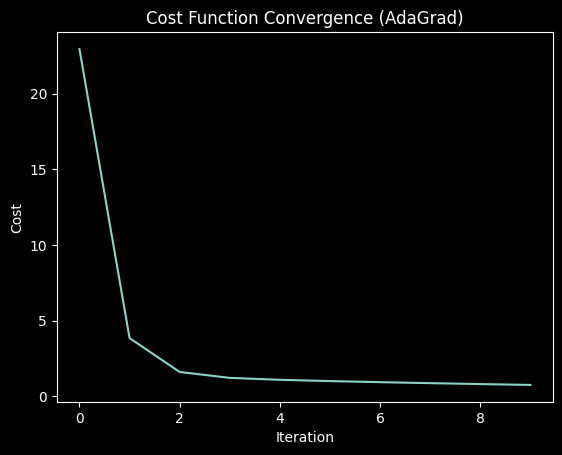

Minimum cost: 0.7419151767220376


In [154]:
learning_rate = 2
n_iterations = 10
epsilon = 1e-8

beta_adagrad = np.random.randn(X.shape[1], 1)
G = np.zeros((X.shape[1], 1))  # Accumulator for squared gradients
cost_history_adagrad = []

for i in range(n_iterations):
    y_pred = X @ beta_adagrad
    error = y_pred - y

    cost = (1 / len(y)) * np.sum(error**2)
    cost_history_adagrad.append(cost)
    gradient = (2 / len(y)) * X.T @ error

    G += gradient**2

    adjusted_lr = learning_rate / (np.sqrt(G + epsilon))

    beta_adagrad -= adjusted_lr * gradient

plt.plot(range(n_iterations), cost_history_adagrad)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Convergence (AdaGrad)")
plt.show()

print("Minimum cost:", cost_history_adagrad[-1])

## Adding momentum to AdaGrad

Velocity update equation for AdaGrad with momentum:

$$ v_t = \gamma v_{t-1} + \frac{\eta}{\sqrt{G_t + \epsilon}} \nabla C(\beta_t) $$

where 
- $ \gamma $ is the momentum coefficient.


Parameter update equation for AdaGrad with momentum:

$$ \beta_{t+1} = \beta_t - v_t $$

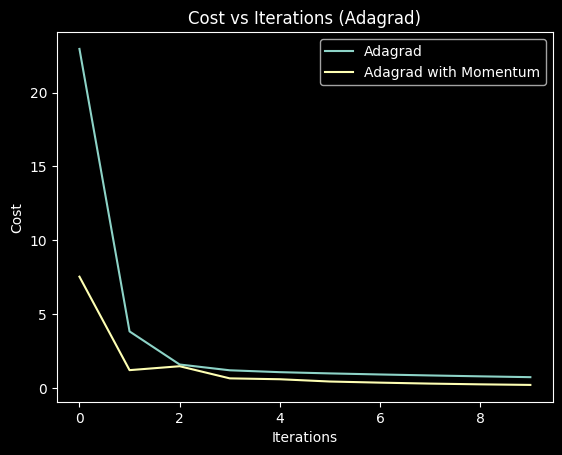

Minimum cost: 0.21710870989225606


In [155]:

# learning_rate = 0.1
# n_iterations = 50
# epsilon = 1e-8
gamma = 0.3  # Momentum coefficient

beta_adagrad_momentum = np.random.randn(X.shape[1], 1)
G_momentum = np.zeros((X.shape[1], 1))  # Accumulator for squared gradients
velocity = np.zeros((X.shape[1], 1))
cost_history_adagrad_momentum = []

for i in range(n_iterations):
    y_pred = X @ beta_adagrad_momentum
    error = y_pred - y

    cost = (1 / len(y)) * np.sum(error**2)
    cost_history_adagrad_momentum.append(cost)

    gradient = (2 / len(y)) * X.T @ error

    G_momentum += gradient**2

    adjusted_lr = learning_rate / (np.sqrt(G_momentum + epsilon))

    velocity = gamma * velocity + adjusted_lr * gradient

    beta_adagrad_momentum -= velocity


plt.plot(range(n_iterations), cost_history_adagrad, label="Adagrad")
plt.plot(range(n_iterations), cost_history_adagrad_momentum, label="Adagrad with Momentum")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations (Adagrad)")
plt.legend()
plt.show()

print("Minimum cost:", cost_history_adagrad_momentum[-1])



In [156]:

learning_rate = 0.1
n_epochs = 10
n_batches = 50
batch_size = len(y) // n_batches
epsilon = 1e-8

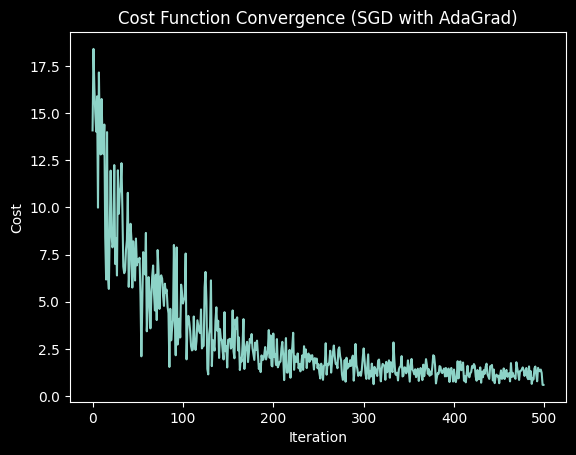

Minimum cost: 0.5882978771208157


In [157]:
def create_mini_batches(X, y, batch_size):
    n_samples = X.shape[0]
    indices = np.random.permutation(n_samples)
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    mini_batches = [
        (X_shuffled[i:i + batch_size], y_shuffled[i:i + batch_size])
        for i in range(0, n_samples, batch_size)
    ]
    return mini_batches

beta_sgd_adagrad = np.random.randn(X.shape[1], 1)
G_sgd = np.zeros((X.shape[1], 1))  # Accumulator for squared gradients
cost_history_sgd_adagrad = []

for epoch in range(n_epochs):
    mini_batches = create_mini_batches(X, y, batch_size)
    for X_mini, y_mini in mini_batches:
        y_pred = X_mini @ beta_sgd_adagrad
        error = y_pred - y_mini

        cost = (1 / len(y_mini)) * np.sum(error**2)
        cost_history_sgd_adagrad.append(cost)

        gradient = (2 / len(y_mini)) * X_mini.T @ error

        G_sgd += gradient**2

        adjusted_lr = learning_rate / (np.sqrt(G_sgd + epsilon))

        beta_sgd_adagrad -= adjusted_lr * gradient

plt.plot(range(len(cost_history_sgd_adagrad)), cost_history_sgd_adagrad)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Convergence (SGD with AdaGrad)")
plt.show()

print("Minimum cost:", cost_history_sgd_adagrad[-1])

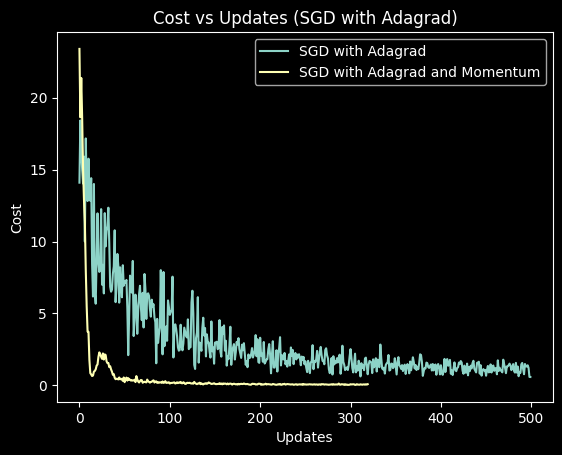

Minimum cost: 0.08952135745170457


In [158]:

learning_rate = 0.1
n_epochs = 10
batch_size = 32
epsilon = 1e-8
gamma = 0.9  # Momentum coefficient


beta_sgd_adagrad_momentum = np.random.randn(X.shape[1], 1)
G_sgd_momentum = np.zeros((X.shape[1], 1))  # Accumulator for squared gradients
velocity_sgd = np.zeros((X.shape[1], 1))
cost_history_sgd_adagrad_momentum = []


for epoch in range(n_epochs):
    mini_batches = create_mini_batches(X, y, batch_size)
    for X_mini, y_mini in mini_batches:

        y_pred = X_mini @ beta_sgd_adagrad_momentum
        error = y_pred - y_mini

        cost = (1 / len(y_mini)) * np.sum(error**2)
        cost_history_sgd_adagrad_momentum.append(cost)

        gradient = (2 / len(y_mini)) * X_mini.T @ error


        G_sgd_momentum += gradient**2


        adjusted_lr = learning_rate / (np.sqrt(G_sgd_momentum + epsilon))


        velocity_sgd = gamma * velocity_sgd + adjusted_lr * gradient

        beta_sgd_adagrad_momentum -= velocity_sgd
plt.plot(cost_history_sgd_adagrad, label="SGD with Adagrad")
plt.plot(cost_history_sgd_adagrad_momentum, label="SGD with Adagrad and Momentum")
plt.xlabel("Updates")
plt.ylabel("Cost")
plt.title("Cost vs Updates (SGD with Adagrad)")
plt.legend()
plt.show()

print("Minimum cost:", cost_history_sgd_adagrad_momentum[-1])


## Root Mean Squared Propagation (RMSProp)

RMSProp adresses the diminishing learning rate problem in AdaGrad by using a moving average of squared gradients. That is changing the accumulator to be a moving average of squared gradients.

1. Initialize the moving average of squared gradients $E[g^2]_0 = 0$.

2. Update the moving average at each iteration:

$$ E[g^2]_t = \rho E[g^2]_{t-1} + (1-\rho)(\nabla C(\beta_t))^2 $$

where:
- $ \rho $ is the moving average decay factor. typically close to 0.9.
- $ (\nabla C(\beta_t))^2 $ is performed element-wise for each parameter.

3. Update the parameters:

$$ \beta_{t+1} = \beta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \nabla C(\beta_t) $$

where:

- $ \eta $ is the global learning rate.
- $ \epsilon $ is a small constant to prevent division by zero.


 

## RMSProp on plain Gradient Descent

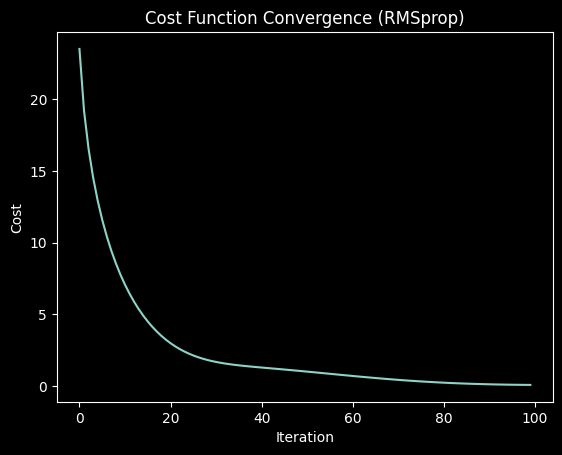

In [ ]:


beta_rmsprop = np.random.randn(X.shape[1], 1)
E_g2 = np.zeros((X.shape[1], 1))
cost_history_rmsprop = []


for i in range(n_iterations):
    y_pred = X @ beta_rmsprop
    error = y_pred - y

    cost = (1 / len(y)) * np.sum(error**2)
    cost_history_rmsprop.append(cost)

    gradient = (2 / len(y)) * X.T @ error

    E_g2 = rho * E_g2 + (1 - rho) * gradient**2

    adjusted_lr = learning_rate / (np.sqrt(E_g2 + epsilon))
    beta_rmsprop -= adjusted_lr * gradient

plt.plot(range(n_iterations), cost_history_rmsprop)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Convergence (RMSprop)")
plt.show()

## SGD with RMSProp

In [ ]:
learning_rate = 0.1
n_epochs = 10
batch_size = 20
epsilon = 1e-8
rho = 0.9  # Decay rate


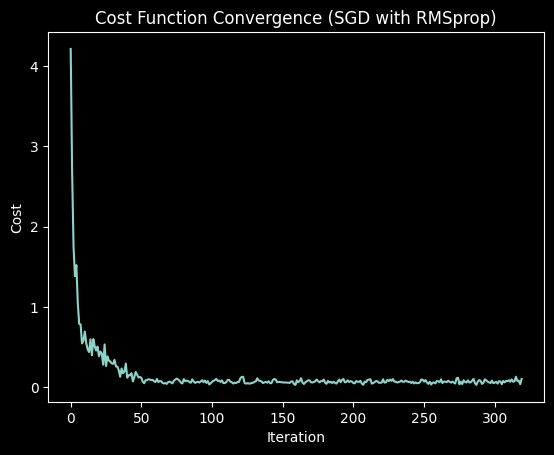

In [208]:

beta_sgd_rmsprop = np.random.randn(X.shape[1], 1)
E_g2_sgd = np.zeros((X.shape[1], 1))
cost_history_sgd_rmsprop = []

for epoch in range(n_epochs):
    mini_batches = create_mini_batches(X, y, batch_size)
    for X_mini, y_mini in mini_batches:

        y_pred = X_mini @ beta_sgd_rmsprop
        error = y_pred - y_mini

        cost = (1 / len(y_mini)) * np.sum(error**2)
        cost_history_sgd_rmsprop.append(cost)

        gradient = (2 / len(y_mini)) * X_mini.T @ error

        E_g2_sgd = rho * E_g2_sgd + (1 - rho) * gradient**2

        adjusted_lr = learning_rate / (np.sqrt(E_g2_sgd + epsilon))

        beta_sgd_rmsprop -= adjusted_lr * gradient

plt.plot(range(len(cost_history_sgd_rmsprop)), cost_history_sgd_rmsprop)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Convergence (SGD with RMSprop)")
plt.show()

## Adam Adaptive Moment Estimation Optimizer 

Adam combines the ideas from RMSProp and momentum. It computes adaptive learning rates for each parameter by using the moving average of both the first and second moments of the gradients.

1. Initialize the first and second moment estimates $m_0 = 0$ and $v_0 = 0$.

2. At each iteration $t$:
    - Compute the gradient $g_t = \nabla C(\beta_t)$.
    - Update the biased first moment estimate:
    $$ m_t = \beta_1 m_{t-1} + (1-\beta_1)g_t $$
    - Update the biased second moment estimate:
    $$ v_t = \beta_2 v_{t-1} + (1-\beta_2)g_t^2 $$
    - Correct the bias:
    $$ \hat{m}_t = \frac{m_t}{1-\beta_1^t} $$
    $$ \hat{v}_t = \frac{v_t}{1-\beta_2^t} $$
    - Update the parameters:
    $$ \beta_{t+1} = \beta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t $$
    
where:
- $ \beta_1 $ and $ \beta_2 $ are the exponential decay rates for the moment estimates.
- $ \eta $ is the global learning rate.
- $ \epsilon $ is a small constant to prevent division by zero.

**Interpretation**

- The first moment estimate $m_t$ is the mean average of the gradients.
- The second moment estimate $v_t$ is the uncentered variance of the gradients.
- Bias correction is applied to account for the fact that the first and second moment estimates are initialized at zero.


### Adam with Plain Gradient Descent

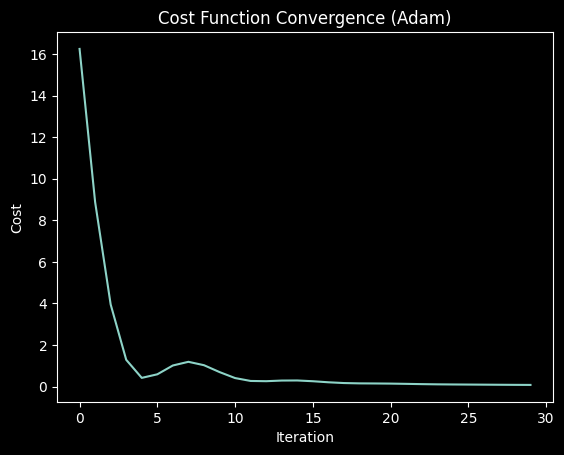

In [ ]:

learning_rate = 0.7
n_iterations = 30
epsilon = 1e-8
rho1 = 0.7  # Decay rate for first moment
rho2 = 0.99  # Decay rate for second moment

# Initialization
beta_adam = np.random.randn(X.shape[1], 1)
m = np.zeros((X.shape[1], 1))  # First moment vector
v = np.zeros((X.shape[1], 1))  # Second moment vector
cost_history_adam = []

# Adam Loop
for t in range(1, n_iterations + 1):
    y_pred = X @ beta_adam
    error = y_pred - y

    cost = (1 / len(y)) * np.sum(error**2)
    cost_history_adam.append(cost)

    gradient = (2 / len(y)) * X.T @ error

    m = rho1 * m + (1 - rho1) * gradient

    v = rho2 * v + (1 - rho2) * gradient**2

    m_hat = m / (1 - rho1**t)

    v_hat = v / (1 - rho2**t)

    beta_adam -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

plt.plot(range(n_iterations), cost_history_adam)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Convergence (Adam)")
plt.show()

### Adam with SGD

In [224]:
learning_rate = 0.1
n_epochs = 5
batch_size = 20
epsilon = 1e-8
beta1 = 0.9
beta2 = 0.999


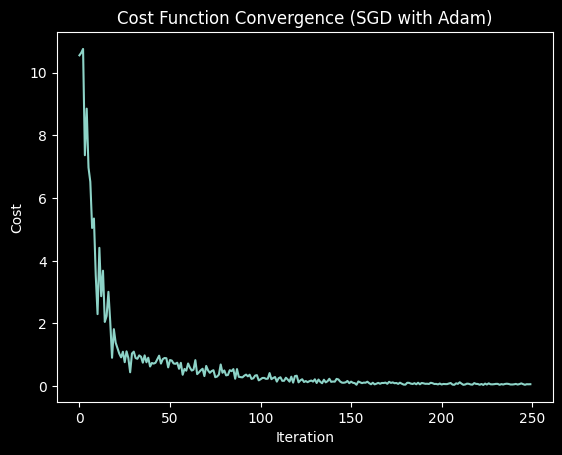

In [225]:

beta_sgd_adam = np.random.randn(X.shape[1], 1)
m_sgd = np.zeros((X.shape[1], 1))
v_sgd = np.zeros((X.shape[1], 1))
cost_history_sgd_adam = []
t = 0  


for epoch in range(n_epochs):
    mini_batches = create_mini_batches(X, y, batch_size)
    for X_mini, y_mini in mini_batches:
        t += 1 

        y_pred = X_mini @ beta_sgd_adam
        error = y_pred - y_mini

        cost = (1 / len(y_mini)) * np.sum(error**2)
        cost_history_sgd_adam.append(cost)

        gradient = (2 / len(y_mini)) * X_mini.T @ error
        m_sgd = beta1 * m_sgd + (1 - beta1) * gradient

        v_sgd = beta2 * v_sgd + (1 - beta2) * gradient**2

        m_hat_sgd = m_sgd / (1 - beta1**t)

        v_hat_sgd = v_sgd / (1 - beta2**t)
        beta_sgd_adam -= learning_rate * m_hat_sgd / (np.sqrt(v_hat_sgd) + epsilon)

plt.plot(range(len(cost_history_sgd_adam)), cost_history_sgd_adam)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function Convergence (SGD with Adam)")
plt.show()

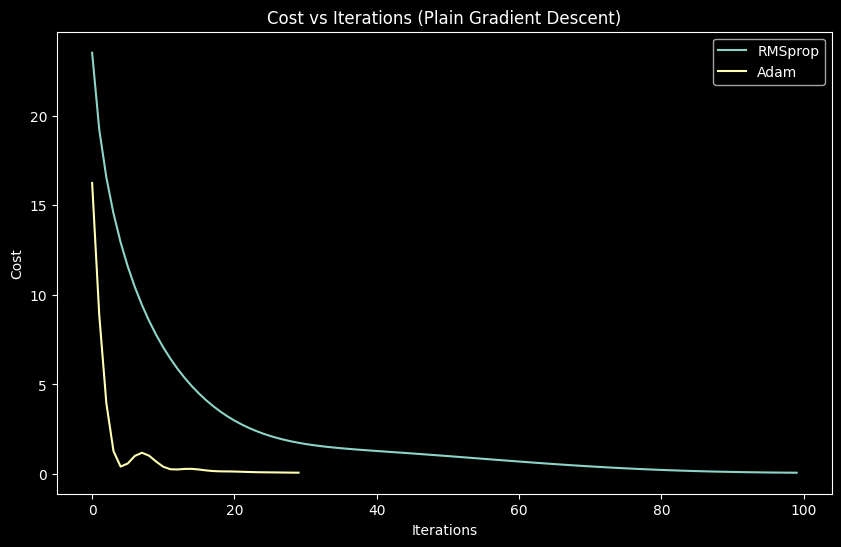

In [226]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history_rmsprop, label="RMSprop")
plt.plot(cost_history_adam, label="Adam")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations (Plain Gradient Descent)")
plt.legend()
plt.show()


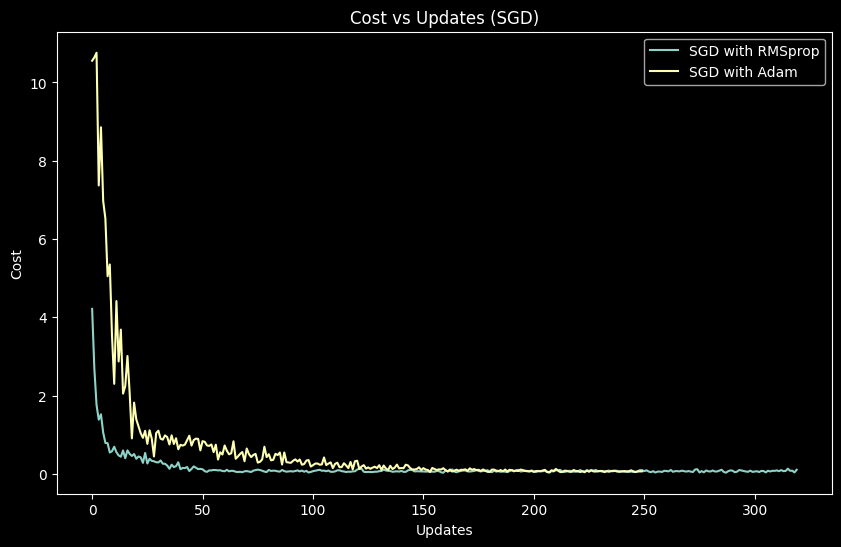

In [227]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history_sgd_rmsprop, label="SGD with RMSprop")
plt.plot(cost_history_sgd_adam, label="SGD with Adam")
plt.xlabel("Updates")
plt.ylabel("Cost")
plt.title("Cost vs Updates (SGD)")
plt.legend()
plt.show()
